# Pyro Examples

In [1]:
import pandas as pd
import numpy as np

import orbit
from orbit.models.lgt import LGTMAP, LGTAggregated, LGTFull
from orbit.estimators.pyro_estimator import PyroEstimatorVI, PyroEstimatorMAP
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components
from orbit.utils.dataset import load_iclaims

In [2]:
orbit.__version__

'1.0.14dev'

In [3]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Data

In [4]:
df = load_iclaims()

DATE_COL = 'week'
RESPONSE_COL = 'claims'

df.dtypes

week              datetime64[ns]
claims                   float64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
sp500                    float64
vix                      float64
dtype: object

### Train / Test Split

In [5]:
test_size=52

train_df=df[:-test_size]
test_df=df[-test_size:]

## MAP Fit and Predict

In [6]:
lgt_map = LGTMAP(response_col=RESPONSE_COL,
                 date_col=DATE_COL,
                 seasonality=52,
                 seed=8888,
                 estimator_type=PyroEstimatorMAP,
                 learning_rate=0.3,
                 num_steps=501)

In [7]:
%%time
lgt_map.fit(df=train_df)

CPU times: user 1min 26s, sys: 1.38 s, total: 1min 28s
Wall time: 1min 46s


In [8]:
predicted_df = lgt_map.predict(df=test_df)

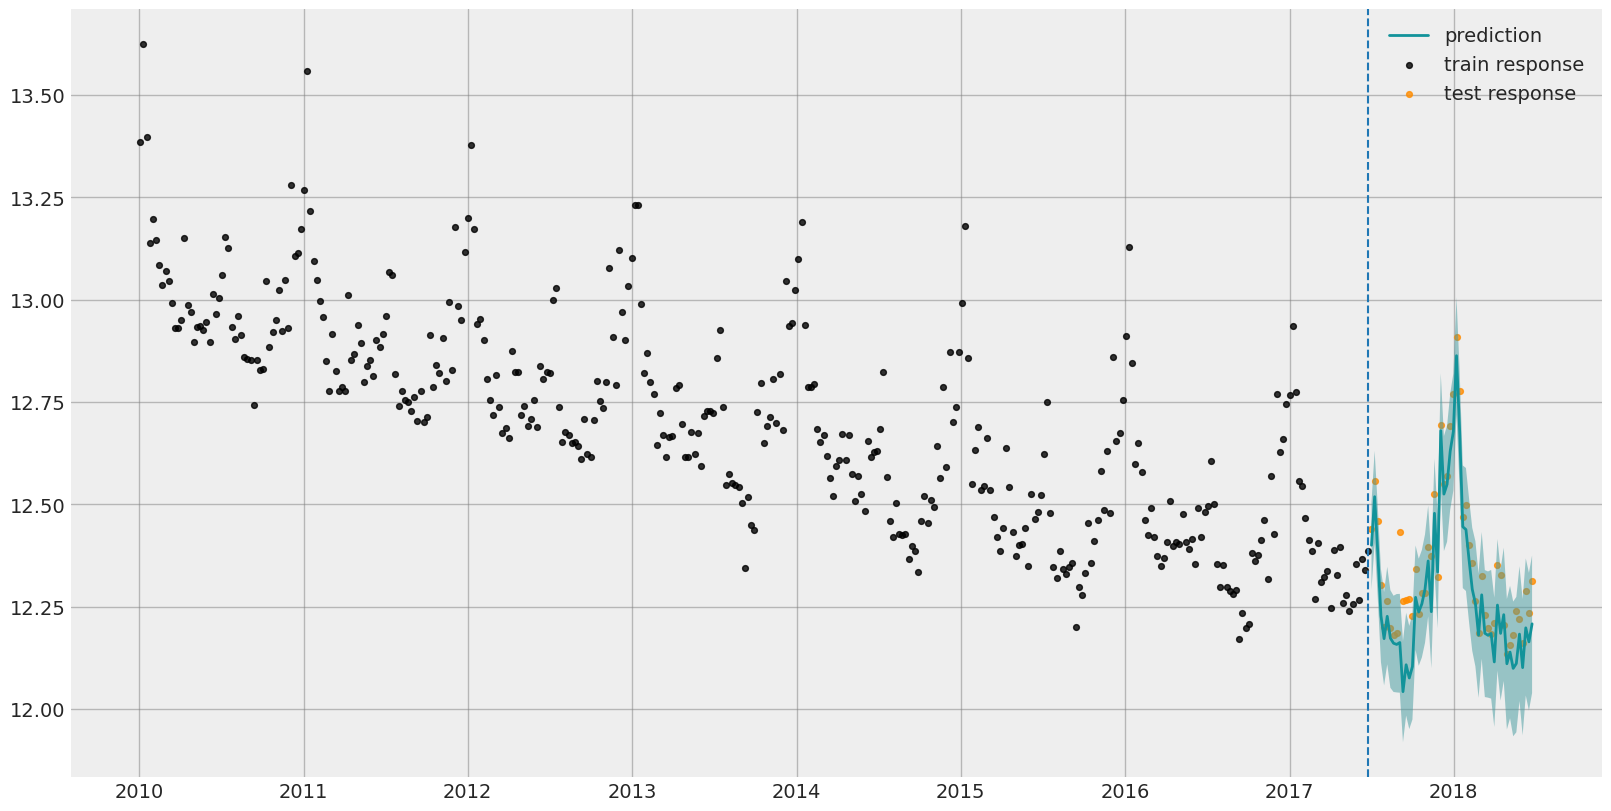

In [9]:
_ = plot_predicted_data(training_actual_df=train_df,
                        predicted_df=predicted_df,
                        date_col=DATE_COL,
                        actual_col=RESPONSE_COL,
                        test_actual_df=test_df)

## VI Fit and Predict

Pyro only support Variational Inference(SVI) for full sampling prediction.  Note that `pyro` takes advantage of parallel processing in `vi` and hence result in similar computation time compared to `map`.

In [10]:
lgt_vi = LGTFull(response_col=RESPONSE_COL,
                 date_col=DATE_COL,
                 seasonality=52,
                 seed=8888,
                 estimator_type=PyroEstimatorVI,
                 num_steps=501,
                 num_sample=100,
                 learning_rate=0.1,
                 learning_rate_total_decay=0.1,
                 n_bootstrap_draws=-1,
                 verbose=True)

In [11]:
%%time
lgt_vi.fit(df=train_df)

INFO:root:Guessed max_plate_nesting = 2


step    0 loss = 658.91, scale = 0.11666
step  100 loss = -445.77, scale = 0.34038
step  200 loss = -447.37, scale = 0.34582
step  300 loss = -448.35, scale = 0.33974
step  400 loss = -448.11, scale = 0.34773
step  500 loss = -447.99, scale = 0.34021
CPU times: user 1min 17s, sys: 2.45 s, total: 1min 20s
Wall time: 1min 18s


In [12]:
predicted_df = lgt_vi.predict(df=test_df)

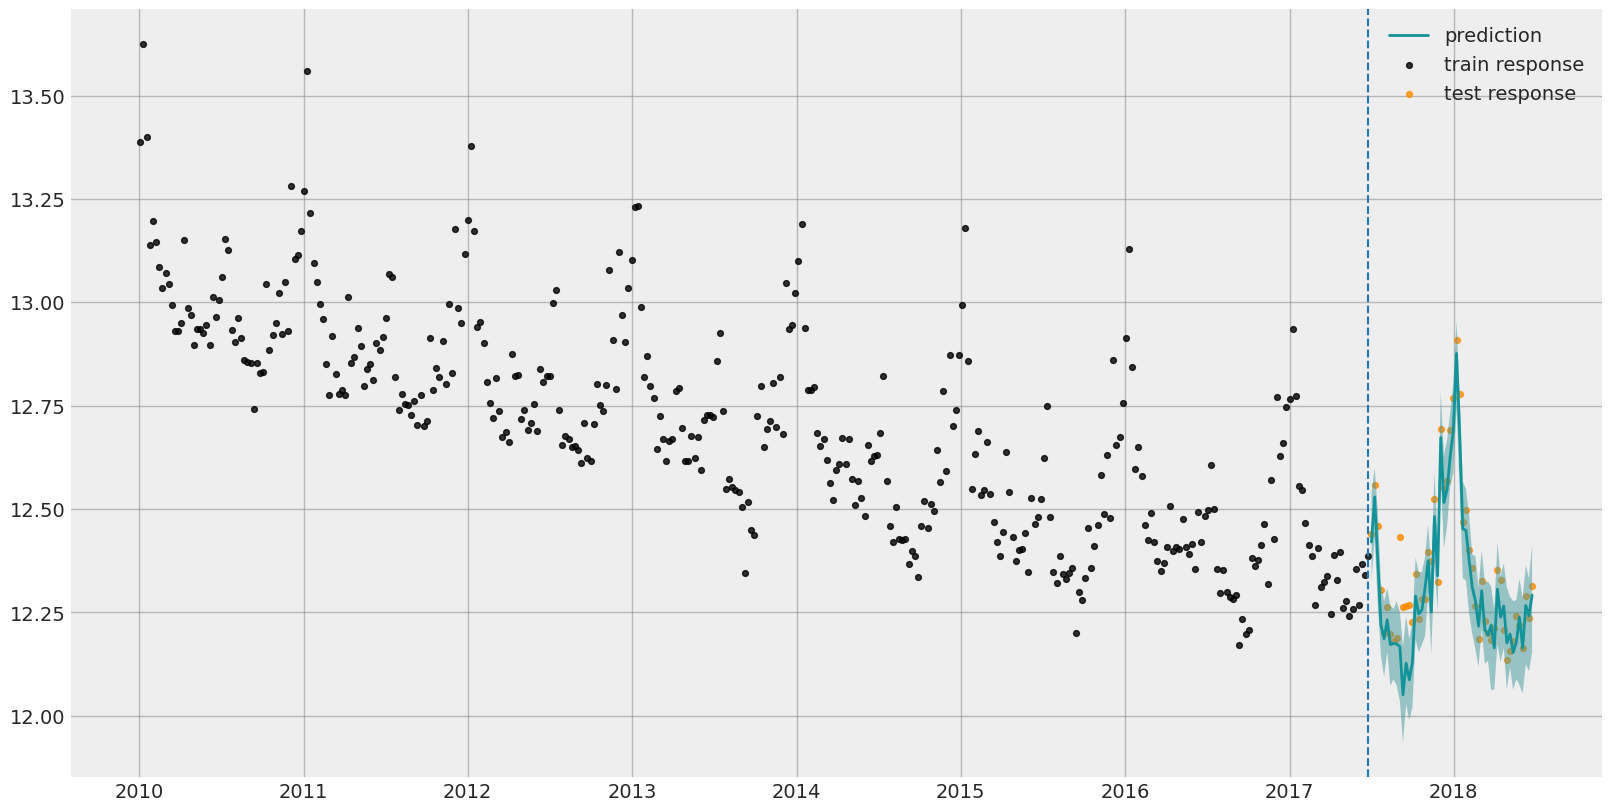

In [13]:
_ = plot_predicted_data(training_actual_df=train_df,
                        predicted_df=predicted_df,
                        date_col=DATE_COL,
                        actual_col=RESPONSE_COL,
                        test_actual_df=test_df)